<img align="left" style="padding-right:10px;" width="150" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Star_Wars_Logo.svg/320px-Star_Wars_Logo.svg.png" />

*elaborado por Ferran Carrascosa Mallafrè.*

< [Control de flujo](modulo1_tema4_Py_40_contr_flujo.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Anexo](modulo1_tema4_Py_60_anexo.ipynb) >

__[Abre en Colab](https://colab.research.google.com/github/griu/init_python_b1/blob/master/modulo1_tema4_Py_50_gest_dat.ipynb)__   *: <span style="color:rgba(255, 99, 71, 0.8)">Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.</span>*

# Preparación del entorno

¡Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código:

In [ ]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/init_python_b1.git /content/init_python_b1
    !git -C /content/init_python_b1 pull
    %cd /content/init_python_b1

# 8 - Gestión de datos

A continuación, presentamos las funciones para la lectura/escritura de datos, cruce y construcción de tablas resumen. 

Al final del capítulo, presentaremos la forma de manejar datos temporales.

##### 8.1. Actividadd Guiada 2.5

Se trata de analizar los personajes de la serie:

>     «Preferiría ser un monstruo que cree en algo, que sacrificaría todo para mejorar la galaxia, que ser alguien que se quede al margen y mire como si no tuviera repercusión en ellos.» 
    ―Princesa Leia Organa 


Esta actividad consiste en cruzar datos de personajes y planetas para construir descriptivos resumen de los datos de personajes.

El primer paso consiste en cargar los datos de los personajes y planetas:

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# planetas
planets_df = entidades_df['planets'][["climate","temperate_tropical","population","url"]].dropna()

# Datos principales
people_df = entidades_df['people'][["height","mass","eye_color","birth_year","gender","homeworld"]].dropna()

display(people_df.head(),planets_df.head())

,height,mass,eye_color,birth_year,gender,homeworld
name,,,,,,
Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,yellow,112.0,none,http://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,red,33.0,none,http://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,yellow,41.9,male,http://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,brown,19.0,female,http://swapi.dev/api/planets/2/


,climate,temperate_tropical,population,url
name,,,,
Tatooine,arid,0,2.000000e+05,http://swapi.dev/api/planets/1/
Alderaan,temperate,1,2.000000e+09,http://swapi.dev/api/planets/2/
Yavin IV,"temperate, tropical",1,1.000000e+03,http://swapi.dev/api/planets/3/
Bespin,temperate,1,6.000000e+06,http://swapi.dev/api/planets/6/
Endor,temperate,1,3.000000e+07,http://swapi.dev/api/planets/7/


### 8.2. Importar y Exportar Datos

La forma más simple de importar datos estructurados (en forma de matriz de filas y columnas), es a través de los DataFrames. El motivo es simple, estos objetos permiten almacenar datos de distinto tipo en un único objeto o tabla de datos.



#### 8.2.1. Lectura Texto con Separador

Para leer el siguiente fichero de texto:

In [ ]:
# mostramos las 5 primeras filas
n=5
with open('www/mtcars.csv') as f:
    muestra_texto = ""
    for i in range(5):
        muestra_texto +=f.readline()
print(muestra_texto)

"mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"
21,6,160,110,3.9,2.62,16.46,0,1,4,4
21,6,160,110,3.9,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1



Dado que se trata de un fichero con un carácter separado, la función genérica para este tipo de ficheros es `pd.read_table()`:

In [ ]:
mtcars = pd.read_table("www/mtcars.csv",sep=',', decimal=".")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Podemos personalizar la carga con los siguiente parámetros:

- `decimal`: el separador decimal.
- `sep`: el separador de columnas.

También, es común el uso de `enconding="latin_1"` cuando el fichero se ha creado con Windows.

Dada la estructura del fichero, con `pd.read_csv()` la carga es más simple:

In [ ]:
mtcars = pd.read_csv("www/mtcars.csv")

A parte de `.head()`, es una buena práctica verificar su carga con `.shape()`, y `describe()`:

In [ ]:
mtcars.shape

(32, 11)

In [ ]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#### 8.2.2. Escritura Texto con Separador 

Para la escritura, puedes utilizar sus equivalentes: `.to_csv()`. Cabe destacar algunas pequeñas variaciones:

In [ ]:
mtcars.to_csv("www/mtcars2.csv", decimal=",", sep=";", index=False, encoding="latin_1")

- `index`: Campo lógico True, False. Por defecto, inserta el número de fila.

Observa cómo el nuevo csv, ahora, tiene el formato de csv europeo con codificación windows.

In [ ]:
# mostramos las 5 primeras filas
n=5
with open('www/mtcars2.csv') as f:
    muestra_texto = ""
    for i in range(5):
        muestra_texto +=f.readline()
print(muestra_texto)

mpg;cyl;disp;hp;drat;wt;qsec;vs;am;gear;carb
21,0;6;160,0;110;3,9;2,62;16,46;0;1;4;4
21,0;6;160,0;110;3,9;2,875;17,02;0;1;4;4
22,8;4;108,0;93;3,85;2,32;18,61;1;1;4;1
21,4;6;258,0;110;3,08;3,215;19,44;1;0;3;1



Para leer texto con ancho fijo, revisa la función [pd.read_fwf()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html).

#### 8.2.3. Lectura y Escritura en Formato PICKLE

Los objetos Python los podemos hacer persistentes en disco con el formato pickle.

> **Sabías que**: pickle significa pepinillo o vinagreta. Es decir, que el formato pickle significa que estamos poniendo los objetos Python en conserva.  

Para guardar un DataFrame en formato pickle, utiliza el método `.to_pickle("nombre.pkl")`:

In [ ]:
mtcars.to_pickle("www/mtcars.pkl")
!dir www/mtcars*

www/mtcars2.csv  www/mtcars.csv  www/mtcars.pkl


Para cargar un fichero pickle (sacarlo de la conserva), utilizamos `pd.read_pickle()`:

In [ ]:
mtcars_pkl = pd.read_pickle("www/mtcars.pkl")
mtcars_pkl.shape

(32, 11)

### 8.3. Cruce entre tablas

Para definir un cruce en pandas, es muy importante ser conscientes de la presencia de los índices fila y columna de las tablas origen. En este sentido, se puede realizar el cruce por 3 sistemas distintos:

- Por índices.
- Por ordenación.
- Por campos clave.

Veamos los dos últimos, ya que el cruce por índices es la opción por defecto en todas las funciones que se van a mostrar.

#### 8.3.1. Cruces por Ordenación Sin Índice Compartido 

Una forma de cruzar dos DataFrames es a partir de la ordenación compartida, ya sea de las filas o las columnas.

#### 8.3.2. Ordenación de Tablas 

Para ordenar una serie, utilizamos el método `.sort.values()`:

In [ ]:
a = people_df.birth_year.sort_values(ascending=False)
a.head()

name
Yoda                     896.0
Jabba Desilijic Tiure    600.0
Chewbacca                200.0
C-3PO                    112.0
Dooku                    102.0
Name: birth_year, dtype: float64

- `ascending`: Campo lógico. Por defecto ordena de forma ascendente.

En DataFrames, no es muy distinto pero, ahora, hay que indicar el campo de ordenación en el parámetro ` by`:

In [ ]:
people_df_Ord = people_df.sort_values(by=["gender","height"], ascending=[True, False])
people_df_Ord.head()

,height,mass,eye_color,birth_year,gender,homeworld
name,,,,,,
Padmé Amidala,185.0,45.0,brown,46.0,female,http://swapi.dev/api/planets/8/
Ayla Secura,178.0,55.0,hazel,48.0,female,http://swapi.dev/api/planets/37/
Luminara Unduli,170.0,56.2,blue,58.0,female,http://swapi.dev/api/planets/51/
Barriss Offee,166.0,50.0,blue,40.0,female,http://swapi.dev/api/planets/51/
Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/


Observa cómo `ascending` permite escoger una ordenación distinta para cada campo de ordenación. 

De esta forma, sabemos que *Padmé Amidala*, con 185 cm, era la mujer más alta de la serie.

#### 8.3.3. Unión por Columnas Sin Índice Compartido 

Para unir las columnas de dos DataFrames que comparten ordenación, utiliza `pd.concat()`.

Para ver un ejemplo, antes vamos a preparar 2 tablas de ejemplo.

Para la primera, seleccionamos las cuatro primeras columnas y reseteamos el índice con `.reset_index()`:

In [ ]:
people_df1 = people_df.iloc[:,:4].reset_index()
people_df1.head()

,name,height,mass,eye_color,birth_year
0,Luke Skywalker,172.0,77.0,blue,19.0
1,C-3PO,167.0,75.0,yellow,112.0
2,R2-D2,96.0,32.0,red,33.0
3,Darth Vader,202.0,136.0,yellow,41.9
4,Leia Organa,150.0,49.0,brown,19.0


> **Importante**: al resetar el índice con `.reset_index()`, éste se ha convertido en un nuevo campo **name** de la tabla.

Ahora, la segunda tabla con el resto de campos:

In [ ]:
people_df2 = people_df.iloc[:,4:]
people_df2.head()

,gender,homeworld
name,,
Luke Skywalker,male,http://swapi.dev/api/planets/1/
C-3PO,none,http://swapi.dev/api/planets/1/
R2-D2,none,http://swapi.dev/api/planets/8/
Darth Vader,male,http://swapi.dev/api/planets/1/
Leia Organa,female,http://swapi.dev/api/planets/2/


Las dos tablas `people_df1` y `people_df2` comparten ordenación, pero no un mismo índice. Para realizar el cruce `ignore_index=True` evita que la función utilice los índices:

In [ ]:
a = pd.concat([people_df1, people_df2], ignore_index=True)
a.head()

,name,height,mass,eye_color,birth_year,gender,homeworld
0,Luke Skywalker,172.0,77.0,blue,19.0,NaN,NaN
1,C-3PO,167.0,75.0,yellow,112.0,NaN,NaN
2,R2-D2,96.0,32.0,red,33.0,NaN,NaN
3,Darth Vader,202.0,136.0,yellow,41.9,NaN,NaN
4,Leia Organa,150.0,49.0,brown,19.0,NaN,NaN


#### 8.3.4. Unión por filas

Para unir dos DataFrames con la misma ordenación de sus columnas, podemos utilizar pd.concat, aunque es más directo con el método `.append()`:

In [ ]:
a1 = people_df.iloc[0:2,:2]
a2 = people_df.iloc[3:5,:2]
a = a1.append(a2)
display(a1,a2,a)

,height,mass
name,,
Luke Skywalker,172.0,77.0
C-3PO,167.0,75.0


,height,mass
name,,
Darth Vader,202.0,136.0
Leia Organa,150.0,49.0


,height,mass
name,,
Luke Skywalker,172.0,77.0
C-3PO,167.0,75.0
Darth Vader,202.0,136.0
Leia Organa,150.0,49.0


> **Importante**: en caso de no compartir los mismos nombres de columnas, se puede utilizar igualmente el siguiente parámetro: `ignore_index=True`.

#### 8.3.5. Cruce por Campos Clave

Antes de realizar un cruce por campos clave, es importante saber si éste tiene valores duplicados. 

##### VECTOR DE CLAVES

Para obtener las claves únicas de una serie o DataFrame, utiliza `.unique()`:

In [ ]:
a = people_df.homeworld.unique()
a

array(['http://swapi.dev/api/planets/1/',
       'http://swapi.dev/api/planets/8/',
       'http://swapi.dev/api/planets/2/',
       'http://swapi.dev/api/planets/20/',
       'http://swapi.dev/api/planets/14/',
       'http://swapi.dev/api/planets/22/',
       'http://swapi.dev/api/planets/23/',
       'http://swapi.dev/api/planets/24/',
       'http://swapi.dev/api/planets/28/',
       'http://swapi.dev/api/planets/10/',
       'http://swapi.dev/api/planets/29/',
       'http://swapi.dev/api/planets/30/',
       'http://swapi.dev/api/planets/6/',
       'http://swapi.dev/api/planets/31/',
       'http://swapi.dev/api/planets/7/',
       'http://swapi.dev/api/planets/36/',
       'http://swapi.dev/api/planets/37/',
       'http://swapi.dev/api/planets/42/',
       'http://swapi.dev/api/planets/43/',
       'http://swapi.dev/api/planets/49/',
       'http://swapi.dev/api/planets/51/',
       'http://swapi.dev/api/planets/52/',
       'http://swapi.dev/api/planets/53/'], dtype=object)

Para saber qué filas de un DataFrame están duplicadas, utiliza `.duplicated()`:

In [ ]:
people_df_dup = people_df.iloc[[1,1,2,3,3,4,5,5,6],:]
people_df_dup.duplicated()

name
C-3PO                 False
C-3PO                  True
R2-D2                 False
Darth Vader           False
Darth Vader            True
Leia Organa           False
Owen Lars             False
Owen Lars              True
Beru Whitesun lars    False
dtype: bool

> **Observa**: la función `.duplicated()` marca como `False` la primera copia y como `True` la segunda copia.

Para eliminar los duplicados, se utiliza `.drop_duplicates()`.

Con `keep=False` se elimina todas las filas con duplicados:

In [ ]:
people_df_dup.drop_duplicates(keep=False)

,height,mass,eye_color,birth_year,gender,homeworld
name,,,,,,
R2-D2,96.0,32.0,red,33.0,none,http://swapi.dev/api/planets/8/
Leia Organa,150.0,49.0,brown,19.0,female,http://swapi.dev/api/planets/2/
Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/


##### 8.3.5.1. Fusión con Claves

Para cruzar 2 tablas con claves, utiliza `pd.merge()`.

##### 8.3.5.2. Inner Join

Recordemos que inner join consiste en construir una tabla que tenga claves coincidentes en las tablas.

Para ver un ejemplo, vamos a seleccionar, por un lado planetas con un clima malo, es decir, que no sea temperado o tropical:

In [ ]:
planets_clima_df = planets_df[planets_df.temperate_tropical==0]
planets_clima_df

,climate,temperate_tropical,population,url
name,,,,
Tatooine,arid,0,2.000000e+05,http://swapi.dev/api/planets/1/
Mustafar,hot,0,2.000000e+04,http://swapi.dev/api/planets/13/
Mygeeto,frigid,0,1.900000e+07,http://swapi.dev/api/planets/16/
Felucia,"hot, humid",0,8.500000e+06,http://swapi.dev/api/planets/17/
Saleucami,hot,0,1.400000e+09,http://swapi.dev/api/planets/19/
Eriadu,polluted,0,2.200000e+10,http://swapi.dev/api/planets/21/
Rodia,hot,0,1.300000e+09,http://swapi.dev/api/planets/23/
Trandosha,arid,0,4.200000e+07,http://swapi.dev/api/planets/29/
Socorro,arid,0,3.000000e+08,http://swapi.dev/api/planets/30/


Por otro lado, seleccionamos personajes con color de ojos azul:

In [ ]:
people_eyes_df = people_df[people_df.eye_color=="blue"]
people_eyes_df

,height,mass,eye_color,birth_year,gender,homeworld
name,,,,,,
Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/
Owen Lars,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/
Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/
Anakin Skywalker,188.0,84.0,blue,41.9,male,http://swapi.dev/api/planets/1/
Chewbacca,228.0,112.0,blue,200.0,male,http://swapi.dev/api/planets/14/
Lobot,175.0,79.0,blue,37.0,male,http://swapi.dev/api/planets/6/
Qui-Gon Jinn,193.0,89.0,blue,92.0,male,http://swapi.dev/api/planets/28/
Luminara Unduli,170.0,56.2,blue,58.0,female,http://swapi.dev/api/planets/51/
Barriss Offee,166.0,50.0,blue,40.0,female,http://swapi.dev/api/planets/51/


El campo coincidente clave para el cruce es `url` que equivale al campo `homeworld` de people_df:

In [ ]:
a_inner = pd.merge(people_eyes_df, planets_clima_df, left_on=["homeworld"], right_on=["url"])
a_inner.head()

,height,mass,eye_color,birth_year,gender,homeworld,climate,temperate_tropical,population,url
0,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/,arid,0,200000.0,http://swapi.dev/api/planets/1/
1,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/,arid,0,200000.0,http://swapi.dev/api/planets/1/
2,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/,arid,0,200000.0,http://swapi.dev/api/planets/1/
3,188.0,84.0,blue,41.9,male,http://swapi.dev/api/planets/1/,arid,0,200000.0,http://swapi.dev/api/planets/1/


Vemos que hay cuatro personajes de ojos azules que nacieron en planetas con mal clima. El problema es que, con el cruce, se han perdido los nombres de ambas tablas contenidos en los índices. Rescatémoslos, antes del cruce, con la función reset_index():

In [ ]:
people_eyes_df = people_eyes_df.reset_index()
planets_clima_df = planets_clima_df.reset_index()

a_inner = pd.merge(people_eyes_df, planets_clima_df, left_on=["homeworld"], right_on=["url"])
a_inner.head()

,name_x,height,mass,eye_color,birth_year,gender,homeworld,name_y,climate,temperate_tropical,population,url
0,Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/
1,Owen Lars,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/
2,Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/
3,Anakin Skywalker,188.0,84.0,blue,41.9,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/


> **Observa**: el campo `name` estaba duplicado en ambas tablas sin ser campo clave. `pd.merge()` ha incluido ambos en la tabla final añadiendo el sufijo `_x` para tabla la izquierda (people_df) y `_y` tabla derecha (planets_df).

El cruce se ha hecho, de forma implícita, con la opción `how="inner"`: 

##### 8.3.5.3. Outer Join

Para conservar **todos los registros de las tablas originales**, tanto de la tabla izquierda como de la tabla derecha, coincida o no, se utiliza el parámetro `how = "outer"`:

In [ ]:
a_outer = pd.merge(people_eyes_df, planets_clima_df, how = "outer", left_on=["homeworld"], right_on=["url"])
a_outer

,name_x,height,mass,eye_color,birth_year,gender,homeworld,name_y,climate,temperate_tropical,population,url
0,Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,2.000000e+05,http://swapi.dev/api/planets/1/
1,Owen Lars,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,2.000000e+05,http://swapi.dev/api/planets/1/
2,Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,2.000000e+05,http://swapi.dev/api/planets/1/
3,Anakin Skywalker,188.0,84.0,blue,41.9,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,2.000000e+05,http://swapi.dev/api/planets/1/
4,Chewbacca,228.0,112.0,blue,200.0,male,http://swapi.dev/api/planets/14/,NaN,NaN,NaN,NaN,NaN
5,Lobot,175.0,79.0,blue,37.0,male,http://swapi.dev/api/planets/6/,NaN,NaN,NaN,NaN,NaN
6,Qui-Gon Jinn,193.0,89.0,blue,92.0,male,http://swapi.dev/api/planets/28/,NaN,NaN,NaN,NaN,NaN
7,Luminara Unduli,170.0,56.2,blue,58.0,female,http://swapi.dev/api/planets/51/,NaN,NaN,NaN,NaN,NaN
8,Barriss Offee,166.0,50.0,blue,40.0,female,http://swapi.dev/api/planets/51/,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mustafar,hot,0.0,2.000000e+04,http://swapi.dev/api/planets/13/


Observa que, ahora, no ha descartado ningún registro de las tablas origen. Además, ha rellenado con `NaN` los campos que no cruzan. Este comportamiento en SQL es conocido como *FULL JOIN* o *OUTTER JOIN*.



##### 8.3.5.4. Left Join

Para imponer que conserve **todos los valores origen de la tabla izquierda** y que descarte los de la tabla derecha que no sean compartidos, utiliza `how="left"`:

In [ ]:
a_left = pd.merge(people_eyes_df, planets_clima_df, how="left", left_on=["homeworld"], right_on=["url"])
a_left

,name_x,height,mass,eye_color,birth_year,gender,homeworld,name_y,climate,temperate_tropical,population,url
0,Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,200000.0,http://swapi.dev/api/planets/1/
1,Owen Lars,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,200000.0,http://swapi.dev/api/planets/1/
2,Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,200000.0,http://swapi.dev/api/planets/1/
3,Anakin Skywalker,188.0,84.0,blue,41.9,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0.0,200000.0,http://swapi.dev/api/planets/1/
4,Chewbacca,228.0,112.0,blue,200.0,male,http://swapi.dev/api/planets/14/,NaN,NaN,NaN,NaN,NaN
5,Lobot,175.0,79.0,blue,37.0,male,http://swapi.dev/api/planets/6/,NaN,NaN,NaN,NaN,NaN
6,Qui-Gon Jinn,193.0,89.0,blue,92.0,male,http://swapi.dev/api/planets/28/,NaN,NaN,NaN,NaN,NaN
7,Luminara Unduli,170.0,56.2,blue,58.0,female,http://swapi.dev/api/planets/51/,NaN,NaN,NaN,NaN,NaN
8,Barriss Offee,166.0,50.0,blue,40.0,female,http://swapi.dev/api/planets/51/,NaN,NaN,NaN,NaN,NaN


Ahora, ha conservado todos los personajes.

##### 8.3.5.5. Right Join 

Para preservar **todos los valores de la tabla derecha**, utiliza `how="right"`:

In [ ]:
a_right = pd.merge(people_eyes_df, planets_clima_df, how="right", left_on=["homeworld"], right_on=["url"])
a_right

,name_x,height,mass,eye_color,birth_year,gender,homeworld,name_y,climate,temperate_tropical,population,url
0,Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,2.000000e+05,http://swapi.dev/api/planets/1/
1,Owen Lars,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,2.000000e+05,http://swapi.dev/api/planets/1/
2,Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/,Tatooine,arid,0,2.000000e+05,http://swapi.dev/api/planets/1/
3,Anakin Skywalker,188.0,84.0,blue,41.9,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,2.000000e+05,http://swapi.dev/api/planets/1/
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mustafar,hot,0,2.000000e+04,http://swapi.dev/api/planets/13/
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mygeeto,frigid,0,1.900000e+07,http://swapi.dev/api/planets/16/
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Felucia,"hot, humid",0,8.500000e+06,http://swapi.dev/api/planets/17/
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saleucami,hot,0,1.400000e+09,http://swapi.dev/api/planets/19/
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eriadu,polluted,0,2.200000e+10,http://swapi.dev/api/planets/21/
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rodia,hot,0,1.300000e+09,http://swapi.dev/api/planets/23/


Ahora, ha conservado todos los planetas con mal clima.

##### 8.3.5.6. Definición de las Claves

Cuando las claves son campos comunes, no es necesario definir los campos `left_on` y `right_on`. 

Por otro lado, si uno de los campos clave está contenido en el índice del DataFrame, se puede utilizar el parámetro `left_index=True` o `right_index=True` o ambos.  

### 8.4. Resumenes de Agregados

Las librerías numpy y pandas implementan una extensa colección de funciones de resumen.

#### 8.4.1. Describe

Para tener una primera impresión sobre las estadísticas de un DataFrame, se utiliza `.describe()`.

Antes incluyamos a people_df algunas columnas nuevas de distinto tipo y, además, algunos missings:

In [ ]:
people_dfSumm = people_df.copy()

people_dfSumm.loc[people_dfSumm.index[[0,2,4,8,20]],'height'] = np.nan
people_dfSumm.loc[people_dfSumm.index[[0,2,4,8,20]],'eye_color'] = np.nan
people_dfSumm["Alto"] = people_dfSumm.height>188
people_dfSumm["Fecha_hoy"] = np.datetime64('2020-09-06')

people_dfSumm.head()

,height,mass,eye_color,birth_year,gender,homeworld,Alto,Fecha_hoy
name,,,,,,,,
Luke Skywalker,NaN,77.0,NaN,19.0,male,http://swapi.dev/api/planets/1/,False,2020-09-06
C-3PO,167.0,75.0,yellow,112.0,none,http://swapi.dev/api/planets/1/,False,2020-09-06
R2-D2,NaN,32.0,NaN,33.0,none,http://swapi.dev/api/planets/8/,False,2020-09-06
Darth Vader,202.0,136.0,yellow,41.9,male,http://swapi.dev/api/planets/1/,True,2020-09-06
Leia Organa,NaN,49.0,NaN,19.0,female,http://swapi.dev/api/planets/2/,False,2020-09-06


In [ ]:
people_df.describe()

,height,mass,birth_year
count,36.000000,36.000000,36.000000
mean,173.638889,112.233333,91.091667
std,30.941560,215.205026,169.124347
min,66.000000,17.000000,8.000000
25%,170.000000,72.000000,31.375000
50%,179.000000,79.000000,46.500000
75%,188.000000,84.000000,67.500000
max,228.000000,1358.000000,896.000000


Por defecto, calcula los siguientes estadísticos básicos sobre las columnas numéricas:

- `count`: número de valores informados (distintos de NaN).
- `mean`: media.
- `str`: desviación típica.
- `min`: mínimo.
- `25%`: cuantil 25%.
- `50%`: cuantil 50% o mediana.
- `75%`: cuantil 75%.
- `max`: máximo.

Para incluirlas todas, se utiliza `include='all'`:

In [ ]:
people_dfSumm.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,height,mass,eye_color,birth_year,gender,homeworld,Alto,Fecha_hoy
count,31.000000,36.000000,31,36.000000,36,36,36,36
unique,NaN,NaN,7,NaN,4,23,2,1
top,NaN,NaN,brown,NaN,male,http://swapi.dev/api/planets/1/,False,2020-09-06 00:00:00
freq,NaN,NaN,9,NaN,26,7,28,36
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-06 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-06 00:00:00
mean,176.580645,112.233333,NaN,91.091667,NaN,NaN,NaN,NaN
std,29.759899,215.205026,NaN,169.124347,NaN,NaN,NaN,NaN
min,66.000000,17.000000,NaN,8.000000,NaN,NaN,NaN,NaN
25%,171.500000,72.000000,NaN,31.375000,NaN,NaN,NaN,NaN


Ahora, para las columnas no numéricas, informa del `count` y, además,:

- `unique`: número de valores únicos.
- `top`: valor más frecuente.
- `freq`: frecuencia observada del valor top.
- `first` y `last`: para las datetime se informa de la primera y última fecha.

#### 8.4.2. Estadísticos Básicos

Para calcular los estadísticos mostrados en la función `.describe()` con funciones numpy:

In [ ]:
def resumen_numericas_numpy(x):
    return {
        "count":np.sum(~np.isnan(x))
        ,"mean":np.nanmean(x)
        ,"std":np.nanstd(x)
        ,"min":np.min(x)
        ,"quantile 25, 50, 75":np.nanquantile(x, [0.25,.5,.75])
        ,"max":np.max(x)}
    
resumen_numericas_numpy(people_dfSumm.height)

{'count': 31,
 'max': 228.0,
 'mean': 176.58064516129033,
 'min': 66.0,
 'quantile 25, 50, 75': array([171.5, 180. , 189. ]),
 'std': 29.275966355278175}

> **Importante**: las funciones equivalentes np.mean, np.std o np.quantile devuelven NaN cuando el array contienen algún valor NaN.

Ahora, con funciones equivalentes en pandas:

In [ ]:
def resumen_numericas_pandas(x):
    return {
        "count":x.count()
        ,"mean":x.mean()
        ,"std":x.std()
        ,"min":x.min()
        ,"quantile 25, 50, 75":x.quantile([0.25,.5,.75])
        ,"max":x.max()}
    
resumen_numericas_pandas(people_dfSumm.height)

{'count': 31,
 'max': 228.0,
 'mean': 176.58064516129033,
 'min': 66.0,
 'quantile 25, 50, 75': 0.25    171.5
 0.50    180.0
 0.75    189.0
 Name: height, dtype: float64,
 'std': 29.759899410166454}

Observa que la opción por defecto en pandas, es eliminar los NaN:

In [ ]:
def resumen_no_numericas_numpy(x):
    value, counts = np.unique(x[~pd.isnull(x)], return_counts=True)
    return {
        "count":np.sum(~pd.isnull(x))
        ,"unique": len(np.unique(x[~pd.isnull(x)]))
        ,"top": value[np.argmax(counts)]
        ,"freq":np.max(counts)}

resumen_no_numericas_numpy(people_dfSumm.eye_color)

{'count': 31, 'freq': 9, 'top': 'brown', 'unique': 7}

> **Importante**: en las columnas no numéricas, se han filtrado los valores None o NaN con pd.isnull().

Ahora, con funciones pandas:

In [ ]:
def resumen_no_numericas_pandas(x):
    value, counts = np.unique(x[~pd.isnull(x)], return_counts=True)
    return {
        "count":x.count()
        ,"unique": x.nunique()
        ,"top": list(x.mode())[0]
        ,"freq":(x==list(x.mode())[0]).sum()}

resumen_no_numericas_pandas(people_dfSumm.eye_color)

{'count': 31, 'freq': 9, 'top': 'brown', 'unique': 7}

#### 8.4.3. Tablas de Frecuencias o Conteos

##### FRECUENCIAS O CONTEOS DE UNA COLUMNA

Para obtener las frecuencias de una serie pandas se utiliza `.value_counts()`:

In [ ]:
people_dfSumm.eye_color.value_counts()

brown     9
blue      8
yellow    5
orange    3
hazel     2
black     2
red       2
Name: eye_color, dtype: int64

Por defecto, ordena de más a menos frecuente. 

Podemos ordenarlo, posteriormente, por el índice con `.sort_index()`:

In [ ]:
people_dfSumm.eye_color.value_counts().sort_index()

black     2
blue      8
brown     9
hazel     2
orange    3
red       2
yellow    5
Name: eye_color, dtype: int64

##### 8.4.3.1. Tablas Cruzadas 

Para obtener los conteos o las frecuencias de dos columnas, utiliza `pd.crosstab()`:

In [ ]:
pd.crosstab(people_dfSumm.eye_color,people_dfSumm.gender)

gender,female,hermaphrodite,male,none
eye_color,,,,
black,0,0,2,0
blue,3,0,5,0
brown,1,0,8,0
hazel,1,0,1,0
orange,0,1,2,0
red,0,0,1,1
yellow,0,0,4,1


##### 8.4.3.2. Tramear Columnas 

En pandas series, se puede tramear una columna con la función `pd.cut()`:

In [ ]:
people_dfSumm["Altura_Cat"] = pd.cut(people_dfSumm.height,[-np.infty,171,189,np.infty], right=False)

people_dfSumm[["height","Altura_Cat"]].head(8)

,height,Altura_Cat
name,,
Luke Skywalker,NaN,NaN
C-3PO,167.0,"[-inf, 171.0)"
R2-D2,NaN,NaN
Darth Vader,202.0,"[189.0, inf)"
Leia Organa,NaN,NaN
Owen Lars,178.0,"[171.0, 189.0)"
Beru Whitesun lars,165.0,"[-inf, 171.0)"
Biggs Darklighter,183.0,"[171.0, 189.0)"


Observa cómo pd.cut() ha trameado, en intervalos, la columna `height`. Con `right=False` le pedimos que el intervalo sea cerrado a la izquierda y abierto a la derecha.

Las frecuencias de cada categoría:

In [ ]:
people_dfSumm["Altura_Cat"].value_counts().sort_index()

[-inf, 171.0)      8
[171.0, 189.0)    15
[189.0, inf)       8
Name: Altura_Cat, dtype: int64

> **Importante**: `pd.cut()` crea una nueva columna de tipo `pd.Categorical`. Este tipo de datos contienen .categories() y .codes(), parecidos a los `factores` vistos en R:

In [ ]:
people_dfSumm["Altura_Cat"].dtype

CategoricalDtype(categories=[[-inf, 171.0), [171.0, 189.0), [189.0, inf)],
              ordered=True)

Para recuperar las categorías, utiliza `.cat.categories`:

In [ ]:
people_dfSumm["Altura_Cat"].cat.categories

IntervalIndex([[-inf, 171.0), [171.0, 189.0), [189.0, inf)],
              closed='left',
              dtype='interval[float64]')

Los códigos internos de los valores `.cat.codes`:

In [ ]:
people_dfSumm["Altura_Cat"].cat.codes.head()

name
Luke Skywalker   -1
C-3PO             0
R2-D2            -1
Darth Vader       2
Leia Organa      -1
dtype: int8

Para modificar las etiquetas, puedes modificar, directamente, los índices de las categorías:

In [ ]:
people_dfSumm["Altura_Cat"].cat.categories = ["Bajo/a","Mediano/a","Alto/a"]

people_dfSumm[["height","Altura_Cat"]].head(8)

,height,Altura_Cat
name,,
Luke Skywalker,NaN,NaN
C-3PO,167.0,Bajo/a
R2-D2,NaN,NaN
Darth Vader,202.0,Alto/a
Leia Organa,NaN,NaN
Owen Lars,178.0,Mediano/a
Beru Whitesun lars,165.0,Bajo/a
Biggs Darklighter,183.0,Mediano/a


##### 8.4.3.3. Actividad Guiada 2.5

Veamos ahora, un resumen de la altura de los personajes por el tipo de clima de su planeta.

Los pasos a realizar son:

1. Cruzamos las tablas de personajes y planetas.
1. Construimos una nueva columna trameada de altura en puntos de corte 171 cm  y 189 cm.
1. Cruzamos la altura con el clima del planeta.

In [ ]:
personajes_df = pd.merge(people_df.reset_index(), 
                         planets_df.reset_index(), left_on=["homeworld"], right_on=["url"])
personajes_df.index= personajes_df.name_x         # indexamos por nombre del personaje
personajes_df.head()

,name_x,height,mass,eye_color,birth_year,gender,homeworld,name_y,climate,temperate_tropical,population,url
name_x,,,,,,,,,,,,
Luke Skywalker,Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/
C-3PO,C-3PO,167.0,75.0,yellow,112.0,none,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/
Darth Vader,Darth Vader,202.0,136.0,yellow,41.9,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/
Owen Lars,Owen Lars,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/
Beru Whitesun lars,Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/


In [ ]:
personajes_df["Altura_Cat"] = pd.cut(personajes_df.height,[-np.infty,171,189,np.infty], right=False)
personajes_df.Altura_Cat.cat.categories = ["Bajo/a","Mediano/a","Alto/a"]

personajes_df.Altura_Cat.value_counts().sort_index()

Bajo/a        7
Mediano/a    15
Alto/a        5
Name: Altura_Cat, dtype: int64

In [ ]:
summ_altura_clima = pd.crosstab(personajes_df.Altura_Cat,personajes_df.temperate_tropical)

summ_altura_clima

temperate_tropical,0,1
Altura_Cat,,
Bajo/a,2,5
Mediano/a,6,9
Alto/a,2,3


Para saber el % de personajes de cada estatura que vive en clima temparado-tropical o no, utiliza `normalize="index"`. De esta forma cada fila va a sumar 1 (es decir, 100%):

In [ ]:
summ_altura_clima = pd.crosstab(personajes_df.Altura_Cat,personajes_df.temperate_tropical, normalize="index")

summ_altura_clima.sort_index(axis=1, ascending=False)

temperate_tropical,1,0
Altura_Cat,,
Bajo/a,0.714286,0.285714
Mediano/a,0.600000,0.400000
Alto/a,0.600000,0.400000


Gráficamente:

In [ ]:
summ_altura_clima = summ_altura_clima.sort_index(axis=1, ascending=False) # cambiamos orden columnas para el gráfico
summ_altura_clima

temperate_tropical,1,0
Altura_Cat,,
Bajo/a,0.714286,0.285714
Mediano/a,0.600000,0.400000
Alto/a,0.600000,0.400000


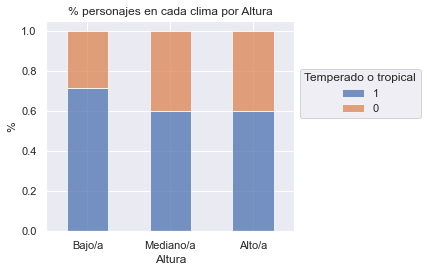

In [ ]:
g = summ_altura_clima.plot.bar(stacked=True,include_bool=True, alpha=0.75, rot=0)
g.legend(bbox_to_anchor=(1, 0.8),title="Temperado o tropical")

plt.gcf().subplots_adjust(bottom=0.15,right=0.7)
plt.title("% personajes en cada clima por Altura")
plt.ylabel("%")
plt.xlabel("Altura");

Observa que un **70% de los personajes bajos** han nacido en climas temperado o tropicales, frente al **60% de los personajes altos**.

### 8.5. Agregados por Subgrupos

Además de frecuencias, es necesario calcular más estadísticos relevantes. Por ejemplo, la mediana de la edad (birth_year), el peso (mass) mínimo de los personajes, o la media de habitantes (population) de sus planetas por tipo de clima y tramo de altura (alto, medio bajo) de los personajes.

#### 8.5.1. Agrupación o *GROUPBY*

Para poder dar una respuesta al problema planteado, antes es necesario introducir el concepto de Agrupación o GroupBy.

La solución planteada en pandas es la de definir una partición de la tabla mediante `.grouby()`. Una vez definida la petición se pueden calcular estadísticos de resumen:

In [ ]:
summ1_altura_clima = personajes_df.groupby(["temperate_tropical"
                                            ,"Altura_Cat"])[["mass","birth_year","population"]].median()

summ1_altura_clima

mass  birth_year    population
temperate_tropical Altura_Cat                                 
0                  Bajo/a       75.0       79.50  2.000000e+05
                   Mediano/a    81.5       36.45  2.000000e+05
                   Alto/a      124.5       47.45  2.110000e+07
1                  Bajo/a       49.0       21.00  3.000000e+09
                   Mediano/a    80.0       46.00  1.500000e+09
                   Alto/a       82.0       92.00  4.500000e+08

Observa cómo se ha aplicado la función mean sobre cada una de las columnas para cada combinación de clima de los planetas y altura de las personas.

También, aparece un elemento nuevo. Es la capacidad de los DataFrames de tener un índice compuesto por más de una columna, en este caso `temperate_tropical` y `Altura_Cat`.

Una forma de sortear los índices múltiples, es incorporarlos como columnas con `.reset_index()`:

In [ ]:
summ1_altura_clima = summ1_altura_clima.reset_index()

summ1_altura_clima

,temperate_tropical,Altura_Cat,mass,birth_year,population
0,0,Bajo/a,75.0,79.50,2.000000e+05
1,0,Mediano/a,81.5,36.45,2.000000e+05
2,0,Alto/a,124.5,47.45,2.110000e+07
3,1,Bajo/a,49.0,21.00,3.000000e+09
4,1,Mediano/a,80.0,46.00,1.500000e+09
5,1,Alto/a,82.0,92.00,4.500000e+08


Ahora los 2 índices se han convertido en columnas de la tabla.

#### 8.5.2. Aggregate 

Para aplicar distintas funciones de agregación a distintas columnas, se utiliza `.aggregate()` o abreviadamente `.agg()` de forma combinada con `.groupby()`. 

Un primer pase, consiste en aplicar varias funciones a todas las columnas seleccionadas del data frame:

In [ ]:
summ2_altura_clima = personajes_df.groupby(
    ["temperate_tropical","Altura_Cat"])[
    ["mass","birth_year","population"]].agg(["min","median","mean"])
summ2_altura_clima

mass                    birth_year         \
                                 min median        mean        min median   
temperate_tropical Altura_Cat                                               
0                  Bajo/a       75.0   75.0   75.000000       47.0  79.50   
                   Mediano/a    74.0   81.5   86.333333       19.0  36.45   
                   Alto/a      113.0  124.5  124.500000       41.9  47.45   
1                  Bajo/a       20.0   49.0   50.600000        8.0  21.00   
                   Mediano/a    45.0   80.0  215.800000       29.0  46.00   
                   Alto/a       66.0   82.0   86.666667       52.0  92.00   

                                           population                \
                                     mean         min        median   
temperate_tropical Altura_Cat                                         
0                  Bajo/a       79.500000    200000.0  2.000000e+05   
                   Mediano/a    35.316667    200000.0  2.000000e+05   
                   Alto/a       47.450000    200000.0  2.110000e+07   
1                  Bajo/a       32.600000  30000000.0  3.000000e+09   
                   Mediano/a   106.500000      5200.0  1.500000e+09   
                   Alto/a      114.666667  45000000.0  4.500000e+08   

                                             
                                       mean  
temperate_tropical Altura_Cat                
0                  Bajo/a      2.000000e+05  
                   Mediano/a   2.668000e+08  
                   Alto/a      2.110000e+07  
1                  Bajo/a      2.806000e+09  
                   Mediano/a   4.889634e+09  
                   Alto/a      1.665000e+09

Observa que ahora hay múltiples índices columna:

In [ ]:
summ2_altura_clima.columns

MultiIndex([(      'mass',    'min'),
            (      'mass', 'median'),
            (      'mass',   'mean'),
            ('birth_year',    'min'),
            ('birth_year', 'median'),
            ('birth_year',   'mean'),
            ('population',    'min'),
            ('population', 'median'),
            ('population',   'mean')],
           )

Una forma de combinar los dos niveles del índice en un solo nombre del tipo `Variable_Estadistico`, es mediante la función de vectorización de funciones `.map()` (puedes ver más información en: [map](https://www.w3schools.com/python/ref_func_map.asp)). La función para combinar los 2 niveles es:  `"_".join`:

In [ ]:
summ2_altura_clima.columns = summ2_altura_clima.columns.map("_".join)  # combina nombres columna
summ2_altura_clima = summ2_altura_clima.reset_index() # pasamos los indices fila a columnas.

summ2_altura_clima

,temperate_tropical,Altura_Cat,mass_min,mass_median,mass_mean,birth_year_min,birth_year_median,birth_year_mean,population_min,population_median,population_mean
0,0,Bajo/a,75.0,75.0,75.000000,47.0,79.50,79.500000,200000.0,2.000000e+05,2.000000e+05
1,0,Mediano/a,74.0,81.5,86.333333,19.0,36.45,35.316667,200000.0,2.000000e+05,2.668000e+08
2,0,Alto/a,113.0,124.5,124.500000,41.9,47.45,47.450000,200000.0,2.110000e+07,2.110000e+07
3,1,Bajo/a,20.0,49.0,50.600000,8.0,21.00,32.600000,30000000.0,3.000000e+09,2.806000e+09
4,1,Mediano/a,45.0,80.0,215.800000,29.0,46.00,106.500000,5200.0,1.500000e+09,4.889634e+09
5,1,Alto/a,66.0,82.0,86.666667,52.0,92.00,114.666667,45000000.0,4.500000e+08,1.665000e+09


Para resolver la cuestión planteada, necesitamos poder decidir, qué estadístico queremos aplicar en cada columna.

Esto lo podemos hacer, mediante un diccionario:

In [ ]:
summ3_altura_clima = personajes_df.groupby(
    ["temperate_tropical","Altura_Cat"]).agg({'name_x': 'count', 'birth_year': 'median'
                                              ,'mass':'min','population':'mean'})

summ3_altura_clima = summ3_altura_clima.reset_index()
summ3_altura_clima

,temperate_tropical,Altura_Cat,name_x,birth_year,mass,population
0,0,Bajo/a,2,79.50,75.0,2.000000e+05
1,0,Mediano/a,6,36.45,74.0,2.668000e+08
2,0,Alto/a,2,47.45,113.0,2.110000e+07
3,1,Bajo/a,5,21.00,20.0,2.806000e+09
4,1,Mediano/a,9,46.00,45.0,4.889634e+09
5,1,Alto/a,3,92.00,66.0,1.665000e+09


Observa, por ejemplo, que hay 2 personajes de estatura baja que nacieron en un planeta de clima NO temperado o tropical, con mediana de edad 79.5 años BBY, peso mínimo 75 Kg y que viven en planetas con una media de 200.000 habitantes.

Para poder identificar cada fila con una etiqueta, vamos a combinar la columna de temperado_tropical con la altura del personaje:

In [ ]:
summ3_altura_clima["clima_altura"] = pd.Series(
    np.where(summ3_altura_clima["temperate_tropical"]==0,"Clima Malo","Clima Bueno")
    ) + "-" + summ3_altura_clima["Altura_Cat"].astype(str)

summ3_altura_clima


,temperate_tropical,Altura_Cat,name_x,birth_year,mass,population,clima_altura
0,0,Bajo/a,2,79.50,75.0,2.000000e+05,Clima Malo-Bajo/a
1,0,Mediano/a,6,36.45,74.0,2.668000e+08,Clima Malo-Mediano/a
2,0,Alto/a,2,47.45,113.0,2.110000e+07,Clima Malo-Alto/a
3,1,Bajo/a,5,21.00,20.0,2.806000e+09,Clima Bueno-Bajo/a
4,1,Mediano/a,9,46.00,45.0,4.889634e+09,Clima Bueno-Mediano/a
5,1,Alto/a,3,92.00,66.0,1.665000e+09,Clima Bueno-Alto/a


Para representar este Pandas, de forma gráfica, podemos utilizar, directamente, `plot.scatter()`:

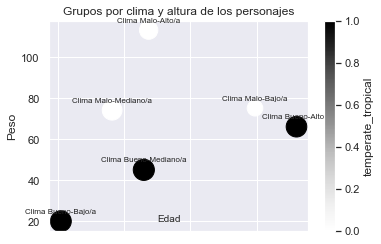

In [ ]:
summ3_altura_clima.plot.scatter(x="birth_year",y="mass",s=20*np.log(summ3_altura_clima.population)
                               ,c="temperate_tropical");

plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.title("Grupos por clima y altura de los personajes");
plt.xlabel("Edad");
plt.ylabel("Peso");
plt.text(50,20,"Edad")
for index,x in summ3_altura_clima.iterrows():
    plt.text(x["birth_year"],x["mass"]+4,x["clima_altura"],horizontalalignment='center',size=8)
plt.show()

Observa que, los 3 grupos de clima Malo (bolas blancas) tienen personajes de mayor peso. 

#### 8.5.3. Filtrado

A parte de agregar, `.groupby()`, podemos utilizar, de forma combinada, con la función `.filter()` para seleccionar grupos de la tabla original que cumplan ciertas condiciones. 

Por ejemplo, seleccionamos el grupo de persoanjes con un mismo clima y tramo de altura dónde la mediana de edad de este grupo sea superior a 90 años:

In [ ]:
seleccion1 = personajes_df.groupby(
    ["temperate_tropical","Altura_Cat"]).filter(lambda fila: fila['birth_year'].median() > 90)

seleccion1

,name_x,height,mass,eye_color,birth_year,gender,homeworld,name_y,climate,temperate_tropical,population,url,Altura_Cat
name_x,,,,,,,,,,,,,
Jar Jar Binks,Jar Jar Binks,196.0,66.0,orange,52.0,male,http://swapi.dev/api/planets/8/,Naboo,temperate,1,4.500000e+09,http://swapi.dev/api/planets/8/,Alto/a
Chewbacca,Chewbacca,228.0,112.0,blue,200.0,male,http://swapi.dev/api/planets/14/,Kashyyyk,tropical,1,4.500000e+07,http://swapi.dev/api/planets/14/,Alto/a
Ki-Adi-Mundi,Ki-Adi-Mundi,198.0,82.0,yellow,92.0,male,http://swapi.dev/api/planets/43/,Cerea,temperate,1,4.500000e+08,http://swapi.dev/api/planets/43/,Alto/a


Vemos cómo el grupo formado por "Jar Jar Binks", "Chewbacca", "Ki-Adi-Mundi" forman parte del mismo grupo de clima y altura y tienen una edad mediana superior a 90 años.

#### 8.5.4. Transformaciones 

Otra utilidad de `.groupby()` combinado con `.transform()` es poder transformar los datos originales con agregados, de forma simple.

Comparamos la edad de cada personaje, respecto a la mediana de su grupo de clima y tramo de altura:

In [ ]:
compara1 = personajes_df.groupby(
    ["temperate_tropical","Altura_Cat"]).birth_year.transform(lambda x: np.abs(x - x.median()))

compara1.sort_values(ascending=False).head()

name_x
Jabba Desilijic Tiure    554.0
Chewbacca                108.0
Palpatine                 61.0
Jar Jar Binks             40.0
C-3PO                     32.5
Name: birth_year, dtype: float64

Observa cómo "Jabba Desilijic Tiure" tiene una diferencia de 554 años sobre la media de su grupo. 

#### 8.5.5. Aplicación de funciones 

Finalmente, para ganar aún mayor flexibilidad para transformar datos, `.groupby()` se combina con `.apply()` para poder aplicar transformaciones de forma selectiva en ciertas columnas del DataFrame:

In [ ]:
def centrado(x):
    x['Edad_c'] = x['birth_year']-x['birth_year'].median()
    return x

personajes_df2 = personajes_df.groupby(["temperate_tropical","Altura_Cat"]).apply(centrado)

personajes_df2.head()

,name_x,height,mass,eye_color,birth_year,gender,homeworld,name_y,climate,temperate_tropical,population,url,Altura_Cat,Edad_c
name_x,,,,,,,,,,,,,,
Luke Skywalker,Luke Skywalker,172.0,77.0,blue,19.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/,Mediano/a,-17.45
C-3PO,C-3PO,167.0,75.0,yellow,112.0,none,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/,Bajo/a,32.50
Darth Vader,Darth Vader,202.0,136.0,yellow,41.9,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/,Alto/a,-5.55
Owen Lars,Owen Lars,178.0,120.0,blue,52.0,male,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/,Mediano/a,15.55
Beru Whitesun lars,Beru Whitesun lars,165.0,75.0,blue,47.0,female,http://swapi.dev/api/planets/1/,Tatooine,arid,0,200000.0,http://swapi.dev/api/planets/1/,Bajo/a,-32.50


Observa que la nueva columna de Edad_c, permite saber que Luke está 19 años por debajo de la mediana de su grupo de clima (malo) y tramo de altura (mediano).

### 8.6. Tablas Pivote 

Las tablas pivotantes `.pivot_table()` son una solución intermedia entre los `pd.crosstabs()`, orientados obtener tablas cruzadas (filas x columnas) y las agregaciones realizadas con `.groupby()`.

Es decir, aplicar distintas funciones de agregación, sobre cruces de filas y columnas predefinidos:

In [ ]:
personajes_df.pivot_table("birth_year", index='Altura_Cat', columns='temperate_tropical')

temperate_tropical,0,1
Altura_Cat,,
Bajo/a,79.500000,32.600000
Mediano/a,35.316667,106.500000
Alto/a,47.450000,114.666667


Esta tabla nos informa de la media de la edad BBY ('birth_year') sobre el cruce de las categorías de altura y clima.

Pivot table, permite crear multiple índice en filas y columnas:

In [ ]:
personajes_df.pivot_table("birth_year", index=['gender','Altura_Cat'], columns='temperate_tropical')

temperate_tropical                 0           1
gender        Altura_Cat                        
female        Bajo/a       47.000000   19.000000
              Mediano/a          NaN   47.000000
hermaphrodite Mediano/a          NaN  600.000000
male          Bajo/a             NaN   37.000000
              Mediano/a    35.316667   44.083333
              Alto/a       47.450000  114.666667
none          Bajo/a      112.000000   33.000000

También, permite seleccionar qué función de agregación se requiere en cada cruce definido:

In [ ]:
personalizarDict = {'name_x': 'count', 'birth_year': 'median'
                                              ,'mass':'min','population':'mean'}
personajes_df.pivot_table(index='Altura_Cat', columns='temperate_tropical'
                          , aggfunc=personalizarDict)

birth_year         mass       name_x      population  \
temperate_tropical          0     1      0     1      0  1            0   
Altura_Cat                                                                
Bajo/a                  79.50  21.0   75.0  20.0      2  5     200000.0   
Mediano/a               36.45  46.0   74.0  45.0      6  9  266800000.0   
Alto/a                  47.45  92.0  113.0  66.0      2  3   21100000.0   

                                  
temperate_tropical             1  
Altura_Cat                        
Bajo/a              2.806000e+09  
Mediano/a           4.889634e+09  
Alto/a              1.665000e+09

Observa cómo se ha obtenido la misma tabla que en el ejercicio con `.agg()`, pero ahora, con otra orientación de filas y columnas.

### 8.7. Gestión de Fechas y Horarios (DATETIME)

La librería para gestión de fechas y horarios en Python es `datetime`. Además, también se utiliza la librería de funcionalidades ampliadas `dateutil`:

In [ ]:
from datetime import datetime
from dateutil import parser

#### 8.7.1. Crear Fechas Horas 

Para crear fechas:

In [ ]:
fecha = datetime(year=2020, month=9, day=7) # con datetime

#### 8.7.2. Obtener Componentes

Para obtener los meses y días de la semana en castellano:

In [ ]:
import locale

locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

fecha.strftime('%A')

'lunes'

Encontrarás más información sobre otros componentes en  la [sección strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior), o bien, en la documentación de [datetime](https://docs.python.org/3/library/datetime.html) de Python.

#### 8.7.3. Datetime y Numpy 

Podemos definir vectores de tipo de datos datetime64:

In [ ]:
fecha = np.array('2020-09-07', dtype=np.datetime64)
fecha

array('2020-09-07', dtype='datetime64[D]')

Ahora, podemos realizar operaciones vectorizadas de forma óptima en numpy:

In [ ]:
fecha + np.arange(12)

array(['2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
       '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14',
       '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18'],
      dtype='datetime64[D]')

También, podemos declarar datetime con fecha y hora:

In [ ]:
np.datetime64('2020-09-07 12:00')

numpy.datetime64('2020-09-07T12:00')

#### 8.7.4. Datetime y Pandas

Para definir fechas:

In [ ]:
fecha = pd.to_datetime("2020-9-7")
fecha

Timestamp('2020-09-07 00:00:00')

Convertir:

In [ ]:
fecha.strftime("%A, %d de %m de %Y")

'lunes, 07 de 09 de 2020'

Vectorizar operaciones:

In [ ]:
fecha + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14',
               '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18'],
              dtype='datetime64[ns]', freq=None)

#####  8.7.4.1. Indexar Pandas con Datetime 

Combinar ambas funcionalidades aporta mucha utilidad:

In [ ]:
index = pd.DatetimeIndex(['2019-08-07', '2019-09-07',
                          '2020-08-07', '2020-09-07'])
fecha = pd.Series([0, 1, 2, 3], index=index)
fecha

2019-08-07    0
2019-09-07    1
2020-08-07    2
2020-09-07    3
dtype: int64

Se puede seleccionar por rangos:

In [ ]:
fecha['2019-08-07':'2020-08-07']

2019-08-07    0
2019-09-07    1
2020-08-07    2
dtype: int64

Incluso sólo por año:

In [ ]:
fecha['2020']

2020-08-07    2
2020-09-07    3
dtype: int64

#### 8.7.5. Series Temporales Pandas

Para definir una serie pandas de datetime:

In [ ]:
fecha = pd.to_datetime(['2019-08-07', '2019-09-07',
                          '2020-08-07', '2020-09-07'])
fecha

DatetimeIndex(['2019-08-07', '2019-09-07', '2020-08-07', '2020-09-07'], dtype='datetime64[ns]', freq=None)

Convertir a frecuencia diaria:

In [ ]:
fecha.to_period('D')

PeriodIndex(['2019-08-07', '2019-09-07', '2020-08-07', '2020-09-07'], dtype='period[D]', freq='D')

Restar fechas:

In [ ]:
fecha - fecha[0]

TimedeltaIndex(['0 days', '31 days', '366 days', '397 days'], dtype='timedelta64[ns]', freq=None)

#### 8.7.6. Secuencias de Fechas 

Para definir una secuencia:

In [ ]:
pd.date_range('2020-09-03', '2020-09-07')

DatetimeIndex(['2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06',
               '2020-09-07'],
              dtype='datetime64[ns]', freq='D')

O bien, especificando la longitud de la secuencia y la periodicidad:

In [ ]:
pd.period_range('2020-07', periods=8, freq='M')

PeriodIndex(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02'],
            dtype='period[M]', freq='M')

#### 8.7.7. Tablas de Conteos o Frecuencias

Para generar frecuencias utiliza `pd.timedelta_range()`:

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Puedes ampliar conocimientos en  la sección de ["Time Series/Date"](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) de la documentación de Pandas.

< [Control de flujo](modulo1_tema4_Py_40_contr_flujo.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Anexo](modulo1_tema4_Py_60_anexo.ipynb) >

__[Abre en Colab](https://colab.research.google.com/github/griu/init_python_b1/blob/master/modulo1_tema4_Py_50_gest_dat.ipynb)__